This notebook includes lots of examples for making simple visualizations using the matplotlib package.

In [1]:
import random

import matplotlib.ticker as ticker
from matplotlib import colors as col
import matplotlib.pyplot as plt
%matplotlib inline

### Data spread

In [2]:
points = random.sample(range(100), 40)
points_collection = [random.sample(range(100), 40) for a in range(4)]
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'grey']

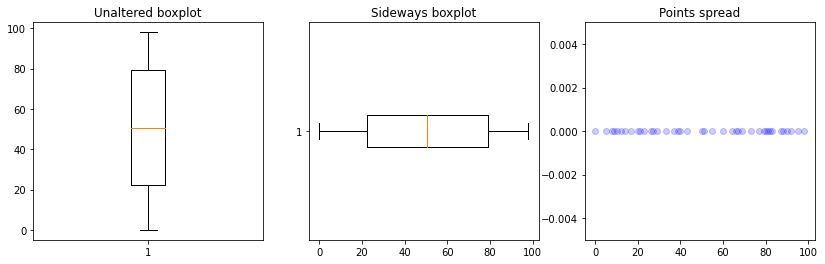

In [3]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(131)
ax.boxplot(points)
ax.set_title("Unaltered boxplot")

bx = fig.add_subplot(132)
bx.boxplot(points, vert=False)
bx.set_title("Sideways boxplot")

cx = fig.add_subplot(133)
cx.scatter(points, [0] * len(points), color='blue', alpha=0.2)
cx.set_ylim([-0.005, 0.005])
cx.set_title('Points spread')
plt.show()

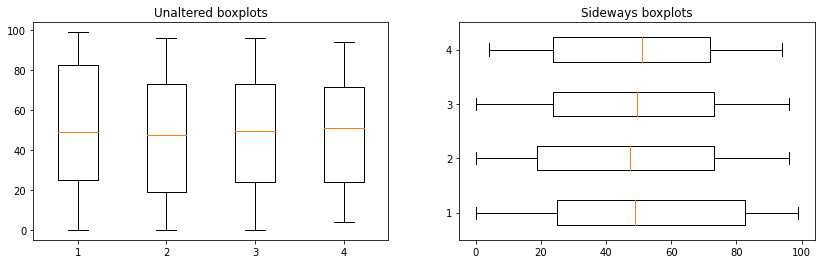

In [4]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)
ax.boxplot(points_collection)
ax.set_title("Unaltered boxplots")

bx = fig.add_subplot(122)
bx.boxplot(points_collection, vert=False)
bx.set_title("Sideways boxplots")
plt.show()

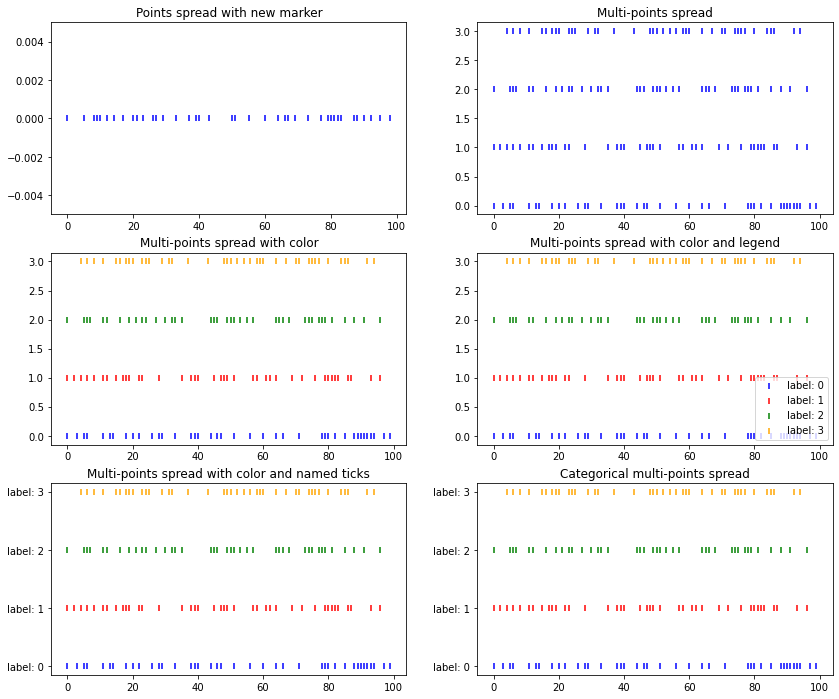

In [5]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(321)
ax.scatter(points, [0] * len(points), color='blue', marker='|')
ax.set_ylim([-0.005, 0.005])
ax.set_title('Points spread with new marker')

bx = fig.add_subplot(322)
bx.scatter(points_collection, [[a] * len(points_collection[0]) for a in range(4)], color='blue', marker='|')
bx.set_title('Multi-points spread')

cx = fig.add_subplot(323)
for index, x in enumerate(points_collection):
    cx.scatter(x, [index] * len(x), color=colors[index], marker='|')
cx.set_title('Multi-points spread with color')

dx = fig.add_subplot(324)
for index, x in enumerate(points_collection):
    dx.scatter(x, [index] * len(x), color=colors[index], marker='|', label='label: {}'.format(index))
dx.set_title('Multi-points spread with color and legend')
dx.legend(loc='lower right')

ex = fig.add_subplot(325)
for index, x in enumerate(points_collection):
    ex.scatter(x, [index] * len(x), color=colors[index], marker='|')
ex.set_yticks([index for index in range(4)])
ex.set_yticklabels(['label: {}'.format(index) for index in range(4)])
ex.set_title('Multi-points spread with color and named ticks')

fx = fig.add_subplot(326)
for index, x in enumerate(points_collection):
    fx.scatter(x, ['label: {}'.format(index)] * len(x), color=colors[index], marker='|')
fx.set_title('Categorical multi-points spread')

plt.show()

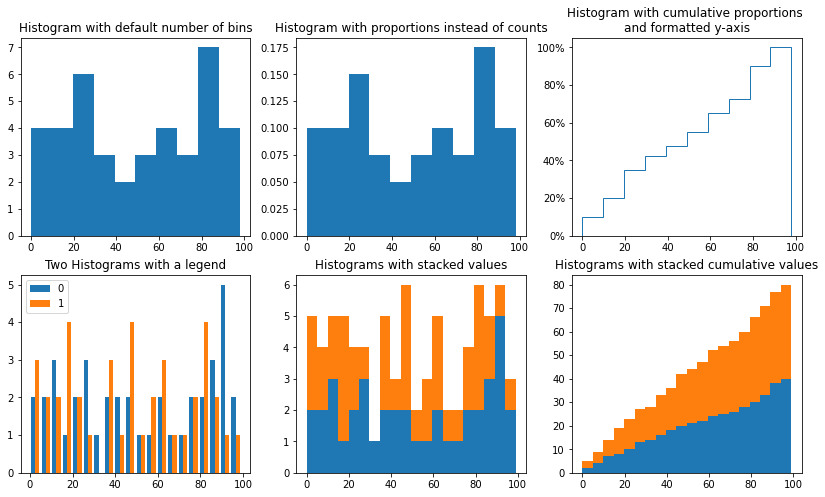

In [6]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(231)
ax.hist(points)
ax.set_title("Histogram with default number of bins")

bx = fig.add_subplot(232)
bx.hist(points, weights=[[1/len(points)] * len(points)])
bx.set_title("Histogram with proportions instead of counts")

cx = fig.add_subplot(233)
cx.hist(points, density=True, cumulative=True, histtype='step')

cx.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
cx.set_title("Histogram with cumulative proportions \nand formatted y-axis")

dx = fig.add_subplot(234)
dx.hist(points_collection[:2], bins=20, label=[0,1])
dx.set_title("Two Histograms with a legend")
dx.legend()

ex = fig.add_subplot(235)
ex.hist(points_collection[:2], bins=20, cumulative=False, histtype='barstacked')
ex.set_title("Histograms with stacked values")

fx = fig.add_subplot(236)
fx.hist(points_collection[:2], bins=20, cumulative=True, histtype='barstacked')
fx.set_title("Histograms with stacked cumulative values")

plt.show()

### Line charts

In [7]:
lines = []
for index in range(4):
    lines.append((range(10), [random.choice(range((index+1), (index+1)*5)) for a in range(10)]))

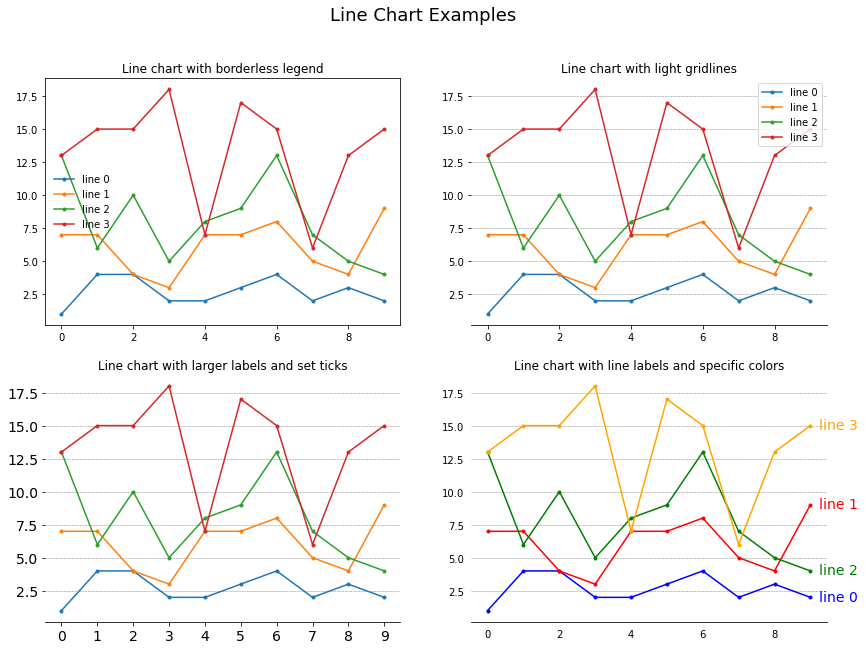

In [14]:
fig = plt.figure(figsize=(14, 10))
fig.suptitle('Line Chart Examples', fontsize=18, ha='center')

ax = fig.add_subplot(221)
for index, line in enumerate(lines):
    ax.plot(line[0], line[1], '.-', label='line {}'.format(index))
ax.legend(frameon=False)
ax.set_title('Line chart with borderless legend')

bx = fig.add_subplot(222)
for index, line in enumerate(lines):
    bx.plot(line[0], line[1], '.-', label='line {}'.format(index))
bx.legend(loc='upper right')

# Remove some of the plot frame lines
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)
bx.spines['left'].set_visible(False)

# add light y-axis lines
bx.grid(True, 'major', 'y', ls='--', lw=.5, c='grey')
    
bx.set_title('Line chart with light gridlines')

cx = fig.add_subplot(223)
for index, line in enumerate(lines):
    cx.plot(line[0], line[1], '.-', label='line {}'.format(index))

# Remove some of the plot frame lines
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.spines['left'].set_visible(False)

# add light y-axis lines
cx.grid(True, 'major', 'y', ls='--', lw=.5, c='grey')

# set x ticks
cx.set_xticks(range(10))

cx.tick_params(axis='both', which='both', labelsize=14) #axis = 'x', 'y', or 'both'
cx.set_title('Line chart with larger labels and set ticks')

dx = fig.add_subplot(224)
for index, line in enumerate(lines):
    dx.plot(line[0], line[1], '.-', color=colors[index], label='line {}'.format(index))
    dx.text(line[0][-1] + 0.25, line[1][-1] - 0.25, 'line {}'.format(index), fontsize=14, color=colors[index])

# Remove some of the plot frame lines
dx.spines['top'].set_visible(False)
dx.spines['right'].set_visible(False)
dx.spines['left'].set_visible(False)

# remove the ticks from the axes
dx.tick_params(axis='both', which='both', bottom=False, left=False)

# add light y-axis lines
dx.grid(True, 'major', 'y', ls='--', lw=.5, c='grey')

dx.set_title('Line chart with line labels and specific colors')

plt.show()

### Bar charts

In [9]:
bar_points = [range(10), [random.choice(range(10)) for a in range(10)]]
sorted_points = sorted(zip(bar_points[0], bar_points[1]), key=lambda x: x[1])

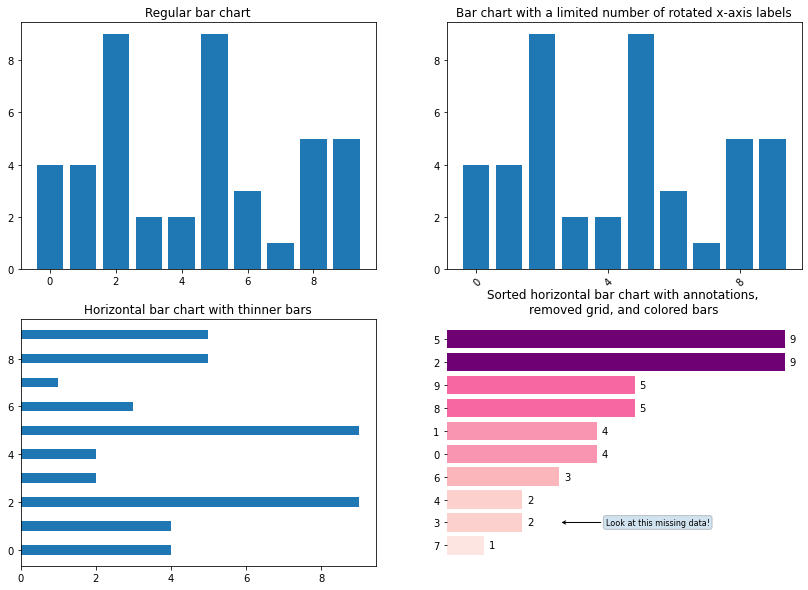

In [15]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(221)
ax.bar(bar_points[0], bar_points[1], align='center')
ax.set_title('Regular bar chart')

bx = fig.add_subplot(222)
bx.bar(bar_points[0], bar_points[1], align='center')
bx.set_title('Bar chart with a limited number of rotated x-axis labels')
bx.set_xticks(range(10))
plt.setp(bx.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
bx.xaxis.set_major_locator(plt.MaxNLocator(3))

cx = fig.add_subplot(223)
cx.barh(bar_points[0], bar_points[1], align='center', height=0.4)
cx.set_title('Horizontal bar chart with thinner bars')

dx = fig.add_subplot(224)
cmap = plt.cm.get_cmap('RdPu')
norm = col.Normalize(0, 10)
bh = dx.barh(range(10), [a[1] for a in sorted_points], color=[cmap(norm(a[1])) for a in sorted_points])
dx.set_title('Sorted horizontal bar chart with annotations, \nremoved grid, and colored bars')
dx.set_yticks(range(len(sorted_points)))
dx.set_yticklabels([a[0] for a in sorted_points])


for index, item in enumerate(sorted_points):
    dx.annotate(item[1], (item[1], index), xytext=(5, 0), \
                 textcoords="offset points", va='center', ha='left') 
    
dx.annotate('Look at this missing data!', xy=(3, 1),
                xytext=(7, 1),
                va="center", ha="right", fontsize=8,
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(arrowstyle="->"),)

dx.spines['top'].set_visible(False)
dx.spines['right'].set_visible(False)
dx.spines['left'].set_visible(False)
dx.spines['bottom'].set_visible(False)
dx.tick_params(axis='both', which='both', bottom=False, labelbottom=False)

plt.show()

### Scatter plots

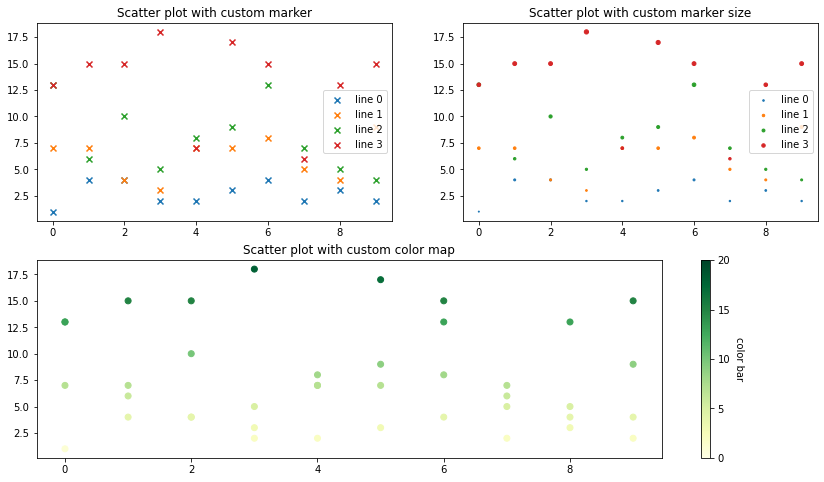

In [11]:
fig = plt.figure(figsize=(14, 8))

ax = plt.subplot2grid((2, 2), (0, 0))
for index, line in enumerate(lines):
    ax.scatter(line[0], line[1], marker='x', label='line {}'.format(index))
ax.legend()
ax.set_title('Scatter plot with custom marker')

bx = plt.subplot2grid((2, 2), (0, 1))
for index, line in enumerate(lines):
    bx.scatter(line[0], line[1], marker='o', s=line[1], label='line {}'.format(index))
bx.legend()
bx.set_title('Scatter plot with custom marker size')

cx = plt.subplot2grid((2, 2), (1, 0), colspan=2)
for index, line in enumerate(lines):
    sc = cx.scatter(line[0], line[1], marker='o', cmap='YlGn', c=line[1], vmin=0, vmax=20)
cx.set_title('Scatter plot with custom color map')
cbar = cx.figure.colorbar(sc)
cbar.ax.set_ylabel("color bar", rotation=-90, va="bottom")
cbar.set_ticks(range(0, 25, 5))

plt.show()

### Time plots

In [2]:
import datetime
import matplotlib.dates as mdates

In [9]:
# generate data
num_points = 50
current_datetime = datetime.datetime.strptime('01/01/2019 00:00:00', '%m/%d/%Y %H:%M:%S')
categories = ['item', 'msg', 'sound', 'email', 'alert']

datetimes = []

# generate the datetimes
for item in range(num_points):
    # add the current time to our collection and calculate the next one
    dt_entry = {'datetime': current_datetime}
    current_datetime += datetime.timedelta(days=1)
    
    # generate the category flag
    for category in categories:
        dt_entry[category] = random.randrange(20)
        
    datetimes.append(dt_entry)

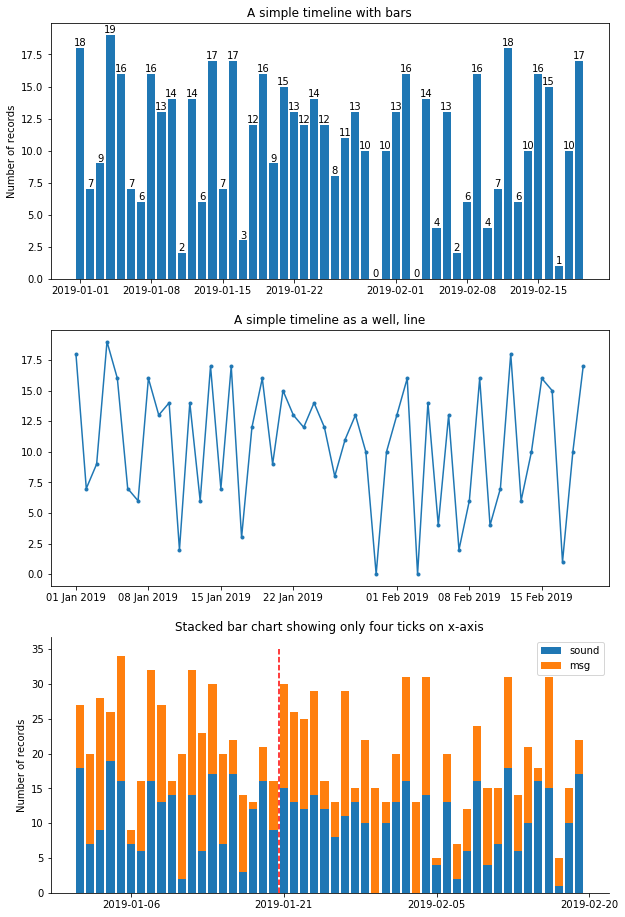

In [31]:
fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(311)
rects = ax.bar([a['datetime'] for a in datetimes], [a['sound'] for a in datetimes])
ax.set_ylabel('Number of records')

# add bar labels
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,\
            '%d' % int(height), ha='center', va='bottom')    
    
ax.set_title('A simple timeline with bars')

bx = fig.add_subplot(312)
bx.plot([a['datetime'] for a in datetimes], [a['sound'] for a in datetimes], '.-')
bx.set_title('A simple timeline as a well, line')
bx.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))


cx = fig.add_subplot(313)
cx.bar([a['datetime'] for a in datetimes], [a['sound'] for a in datetimes], label='sound')
cx.bar([a['datetime'] for a in datetimes], [a['msg'] for a in datetimes], bottom=[a['sound'] for a in datetimes], \
       label='msg')
cx.vlines(datetime.datetime(2019, 1, 20, 12, 0), 0, 35, ls='--', colors='r')
cx.set_ylabel('Number of records')
cx.set_title('Stacked bar chart showing only four ticks on x-axis')
cx.xaxis.set_major_locator(plt.MaxNLocator(4))
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.legend()

plt.show()

In [10]:
import matplotlib.font_manager as fm
print(f'The installed fonts: {sorted(set([f.name for f in fm.fontManager.ttflist]))}')

The installed fonts: ['Adobe Caslon Pro', 'Adobe Garamond Pro', 'Agency FB', 'Algerian', 'Arial', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arno Pro', 'Bahnschrift', 'Baskerville Old Face', 'Bauhaus 93', 'Bell Gothic Std', 'Bell MT', 'Berlin Sans FB', 'Berlin Sans FB Demi', 'Bernard MT Condensed', 'Bickham Script Pro', 'Birch Std', 'Blackadder ITC', 'Blackoak Std', 'Bodoni MT', 'Book Antiqua', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Bradley Hand ITC', 'Britannic Bold', 'Broadway', 'Brush Script MT', 'Brush Script Std', 'Calibri', 'Californian FB', 'Calisto MT', 'Cambria', 'Candara', 'Castellar', 'Centaur', 'Century', 'Century Gothic', 'Century Schoolbook', 'Chaparral Pro', 'Charlemagne Std', 'Chiller', 'Colonna MT', 'Comic Sans MS', 'Consolas', 'Constantia', 'Cooper Black', 'Cooper Std', 'Copperplate Gothic Bold', 'Copperplate Gothic Light', 'Corbel', 'Courier New', 'Curlz MT', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Eb

In [3]:
# generate more data
num_points = 50
current_datetime = datetime.datetime.strptime('01/01/2019 00:00:00', '%m/%d/%Y %H:%M:%S')
items = []

# generate the datetimes
for item in range(num_points):
    # add the current time to our collection and calculate the next one
    items.append({'datetime': current_datetime, \
                  'value': random.randrange(2000)})
    current_datetime += datetime.timedelta(days=1)

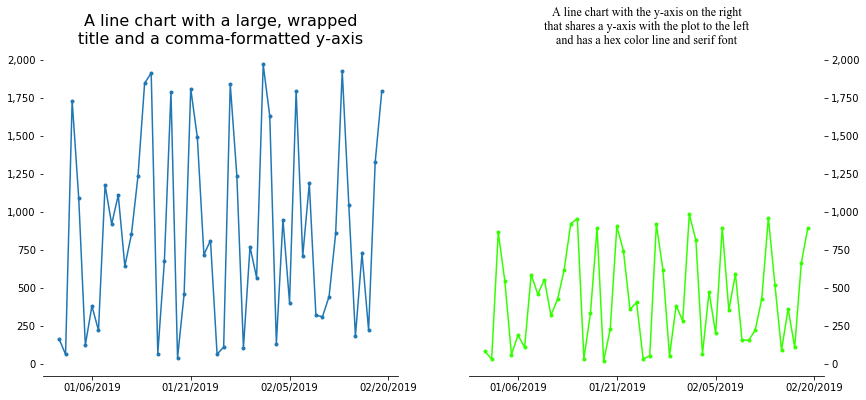

In [11]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
ax.plot([a['datetime'] for a in items], [a['value'] for a in items], '.-')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))    
ax.set_title('A line chart with a large, wrapped\ntitle and a comma-formatted y-axis', fontsize=16)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

bx = fig.add_subplot(122, sharey=ax)
bx.plot([a['datetime'] for a in items], [a['value']/2 for a in items], '.-', c='#33ff00')
bx.set_title('A line chart with the y-axis on the right\nthat shares a y-axis with the plot to the left\nand has a hex color line and serif font', fontname='Times New Roman')
bx.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
bx.xaxis.set_major_locator(plt.MaxNLocator(4))
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)
bx.spines['left'].set_visible(False)
bx.yaxis.tick_right()
plt.show()

In [17]:
import matplotlib.transforms as tms

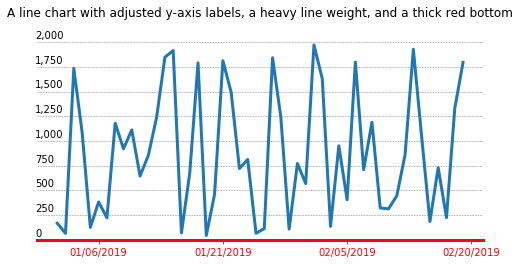

In [45]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot([a['datetime'] for a in items], [a['value'] for a in items], lw=3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))    
ax.set_title('A line chart with adjusted y-axis labels, a heavy line weight, and a thick red bottom')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='grey') # add light y-axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='y', left=False) # remove the ticks from the y-axis
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.spines['bottom'].set_color('red')
ax.spines['bottom'].set_linewidth(3)
ax.set_ylim([0, 2200])

# Create offset transform by 5 points in x direction
# Matplotlib figures use 72 points per inch (ppi). 
# So to to shift something by x points, you may shift it by x/72 inch.
dx = 5/72.; dy = 8/72. 
offset = tms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all y ticklabels and left align them
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    label.set_horizontalalignment('left')
    
plt.show()

### Miscellaneous

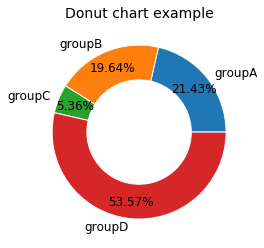

In [189]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_title('Donut chart example', fontsize=14)
# create data
names = ['groupA', 'groupB', 'groupC', 'groupD']
size = [12, 11, 3, 30]
 
plt.pie(size, labels=names, textprops={'fontsize': 12}, \
        autopct='%.2f%%', pctdistance=0.8, \
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.6, color='white')
ax.add_artist(my_circle)
plt.show()

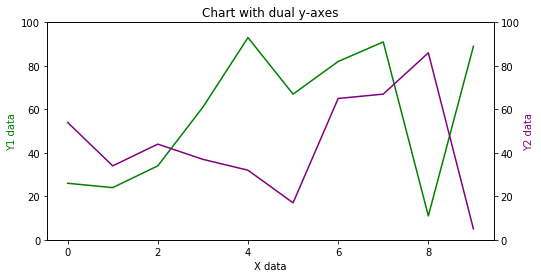

In [11]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(range(10), random.sample(range(100), 10), 'green')
ax.set_ylim([0, 100])
ax2 = ax.twinx()
ax2.plot(range(10), random.sample(range(100), 10), 'purple')
ax2.set_ylim([0, 100])

ax.set_xlabel('X data')
ax.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='purple')
plt.title('Chart with dual y-axes')

plt.show()

### The Economist-style plots

In [3]:
lines = []
for index in range(4):
    lines.append((range(10), [random.choice(range((index+1), (index+1)*5)) for a in range(10)]))
colors = ['#1570a6', '#43cad7', '#e9b265', '#9d394b', \
          '#0f9ca3', '#ac8e9a']
bg_color = '#e1f0f5'
grid_line_color = '#bacbd1'

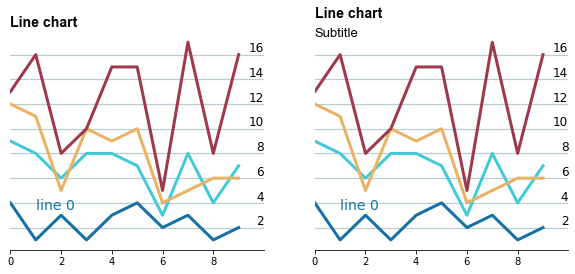

In [98]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for index, line in enumerate(lines):
    ax.plot(line[0], line[1], '-', lw=3, \
            color=colors[index], label='line {}'.format(index))

# just add a label for line 0
ax.text(1, 3.5, 'line 0', fontsize=14, color=colors[0])

ax.set_xlim([0, 10])
    
# Remove some of the plot frame lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# adjust the y-axis
ax.yaxis.tick_right()
dx = -7/72.; dy = 8/72. 
offset = tms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all y ticklabels and left align them
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    label.set_horizontalalignment('right')

# remove the ticks from the y-axis
ax.tick_params(axis='y', right=False, labelsize=12)

# remove last two tick marks and labels on the x-axis
plt.setp(ax.get_xticklabels()[-1], visible=False)    
ax.xaxis.get_major_ticks()[-1].set_visible(False)

# add light y-axis lines
ax.grid(True, 'major', 'y', ls='-', lw=1.2, c=grid_line_color)

ax.set_title('Line chart', loc='left', \
             fontweight='bold', fontname='Arial', fontsize=14)

#-------------------------------
bx = fig.add_subplot(122)
for index, line in enumerate(lines):
    bx.plot(line[0], line[1], '-', lw=3, \
            color=colors[index], label='line {}'.format(index))

# just add a label for line 0
bx.text(1, 3.5, 'line 0', fontsize=14, color=colors[0])

bx.set_xlim([0, 10])
    
# Remove some of the plot frame lines
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)
bx.spines['left'].set_visible(False)

# adjust the y-axis
bx.yaxis.tick_right()

# apply offset transform to all y ticklabels and left align them
for label in bx.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    label.set_horizontalalignment('right')

# remove the ticks from the y-axis
bx.tick_params(axis='y', right=False, labelsize=12)

# remove last tick mark and label on the x-axis
plt.setp(bx.get_xticklabels()[-1], visible=False)    
bx.xaxis.get_major_ticks()[-1].set_visible(False)

# add light y-axis lines
bx.grid(True, 'major', 'y', ls='-', lw=1.2, c=grid_line_color)

bx.text(0, 19, 'Line chart', fontweight='bold', fontname='Arial', fontsize=14)
bx.text(0, 17.5, 'Subtitle', fontname='Arial', fontsize=13)

plt.show()

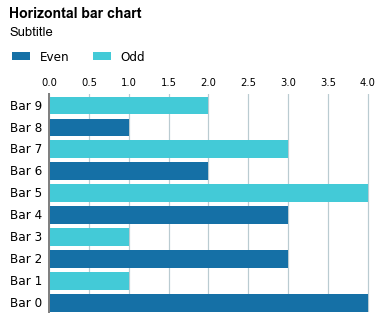

In [171]:
fig = plt.figure(figsize=(6,4))
cx = fig.add_subplot(111)
cx.text(-0.5, 13, 'Horizontal bar chart', fontweight='bold', fontname='Arial', fontsize=14)
cx.text(-0.5, 12.2, 'Subtitle', fontname='Arial', fontsize=13)
bh = cx.barh(lines[0][0][0::2], lines[0][1][0::2], \
             color=colors[0], \
             label='Even', zorder=2)
bh2 = cx.barh(lines[0][0][1::2], lines[0][1][1::2], \
             color=colors[1], \
             label='Odd', zorder=2)
cx.set_yticks(lines[0][0])
cx.set_yticklabels([f'Bar {a}' for a in lines[0][0]], \
                   va='center', fontsize=12)

cx.xaxis.tick_top()
cx.set_ylim([-0.4, 9.5])
    
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.spines['left'].set_linewidth(2)
cx.spines['left'].set_color('grey')
cx.spines['bottom'].set_visible(False)
cx.tick_params(axis='both', which='both', top=False, \
               left=False, labelbottom=False)
cx.grid(True, 'major', 'x', ls='-', lw=1.2, \
        c=grid_line_color, zorder=1)

cx.legend(loc=(-0.125, 1.12), ncol=2, frameon=False, \
          fontsize=12, handlelength=1.5)

plt.show()

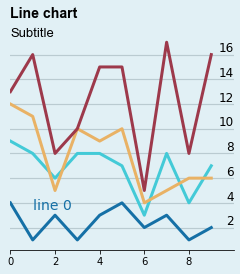

In [113]:
fig = plt.figure(figsize=(4,4))
fig.patch.set_facecolor(bg_color) # this is necessary since the title is above the sub-plot space

cx = fig.add_subplot(111, facecolor=bg_color)
for index, line in enumerate(lines):
    cx.plot(line[0], line[1], '-', lw=3, \
            color=colors[index], label='line {}'.format(index))

# just add a label for line 0
cx.text(1, 3.5, 'line 0', fontsize=14, color=colors[0])

cx.set_xlim([0, 10])
    
# Remove some of the plot frame lines
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.spines['left'].set_visible(False)

# adjust the y-axis
cx.yaxis.tick_right()

# apply offset transform to all y ticklabels and left align them
for label in cx.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    label.set_horizontalalignment('right')

# remove the ticks from the y-axis
cx.tick_params(axis='y', right=False, labelsize=12)

# remove last tick mark and label on the x-axis
plt.setp(cx.get_xticklabels()[-1], visible=False)    
cx.xaxis.get_major_ticks()[-1].set_visible(False)

# add light y-axis lines
cx.grid(True, 'major', 'y', ls='-', lw=1.2, c=grid_line_color)

cx.text(0, 19, 'Line chart', fontweight='bold', fontname='Arial', fontsize=14)
cx.text(0, 17.5, 'Subtitle', fontname='Arial', fontsize=13)

plt.show()

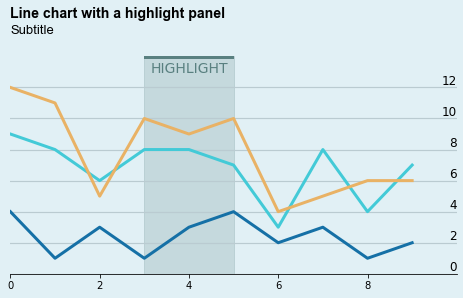

In [224]:
fig = plt.figure(figsize=(8,4))
fig.patch.set_facecolor(bg_color) # this is necessary since the title is above the sub-plot space

cx = fig.add_subplot(111, facecolor=bg_color)
for index, line in enumerate(lines[:-1]):
    cx.plot(line[0], line[1], '-', lw=3, \
            color=colors[index], label='line {}'.format(index))

cx.set_xlim([0, 10])
    
# Remove some of the plot frame lines
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.spines['left'].set_visible(False)

# adjust the y-axis
cx.yaxis.tick_right()
cx.set_ylim([0, 14])

# apply offset transform to all y ticklabels and left align them
for label in cx.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    label.set_horizontalalignment('right')

# remove the ticks from the y-axis
cx.tick_params(axis='y', right=False, labelsize=12)

# remove last tick mark and label on the x-axis
plt.setp(cx.get_xticklabels()[-1], visible=False)    
cx.xaxis.get_major_ticks()[-1].set_visible(False)

# remove last tick mark and label on the y-axis
plt.setp(cx.get_yticklabels()[-1], visible=False)    
cx.yaxis.get_major_ticks()[-1].set_visible(False)

# add light y-axis lines
cx.grid(True, 'major', 'y', ls='-', lw=1.2, c=grid_line_color)

left, bottom, width, height = (3, 0, 2, 14)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor='#598080', alpha=0.2, \
                     edgecolor='#598080')
cx.add_patch(rect)
cx.hlines(height, left, left+width, lw=6, colors='#598080')
cx.text(3.15, 13, 'HIGHLIGHT', fontsize=14, \
        color='#598080')

cx.text(0, 16.5, 'Line chart with a highlight panel', fontweight='bold', fontname='Arial', fontsize=14)
cx.text(0, 15.5, 'Subtitle', fontname='Arial', fontsize=13)

plt.show()